In [2]:
from matplotlib.figure import Figure
import numpy.random as rand
import numpy as np
import scipy as sp
from copy import deepcopy
from astropy.io import fits
from matplotlib.figure import Figure
from scipy.optimize import curve_fit
from scipy import io
import matplotlib as mp
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import matplotlib.colors as colors

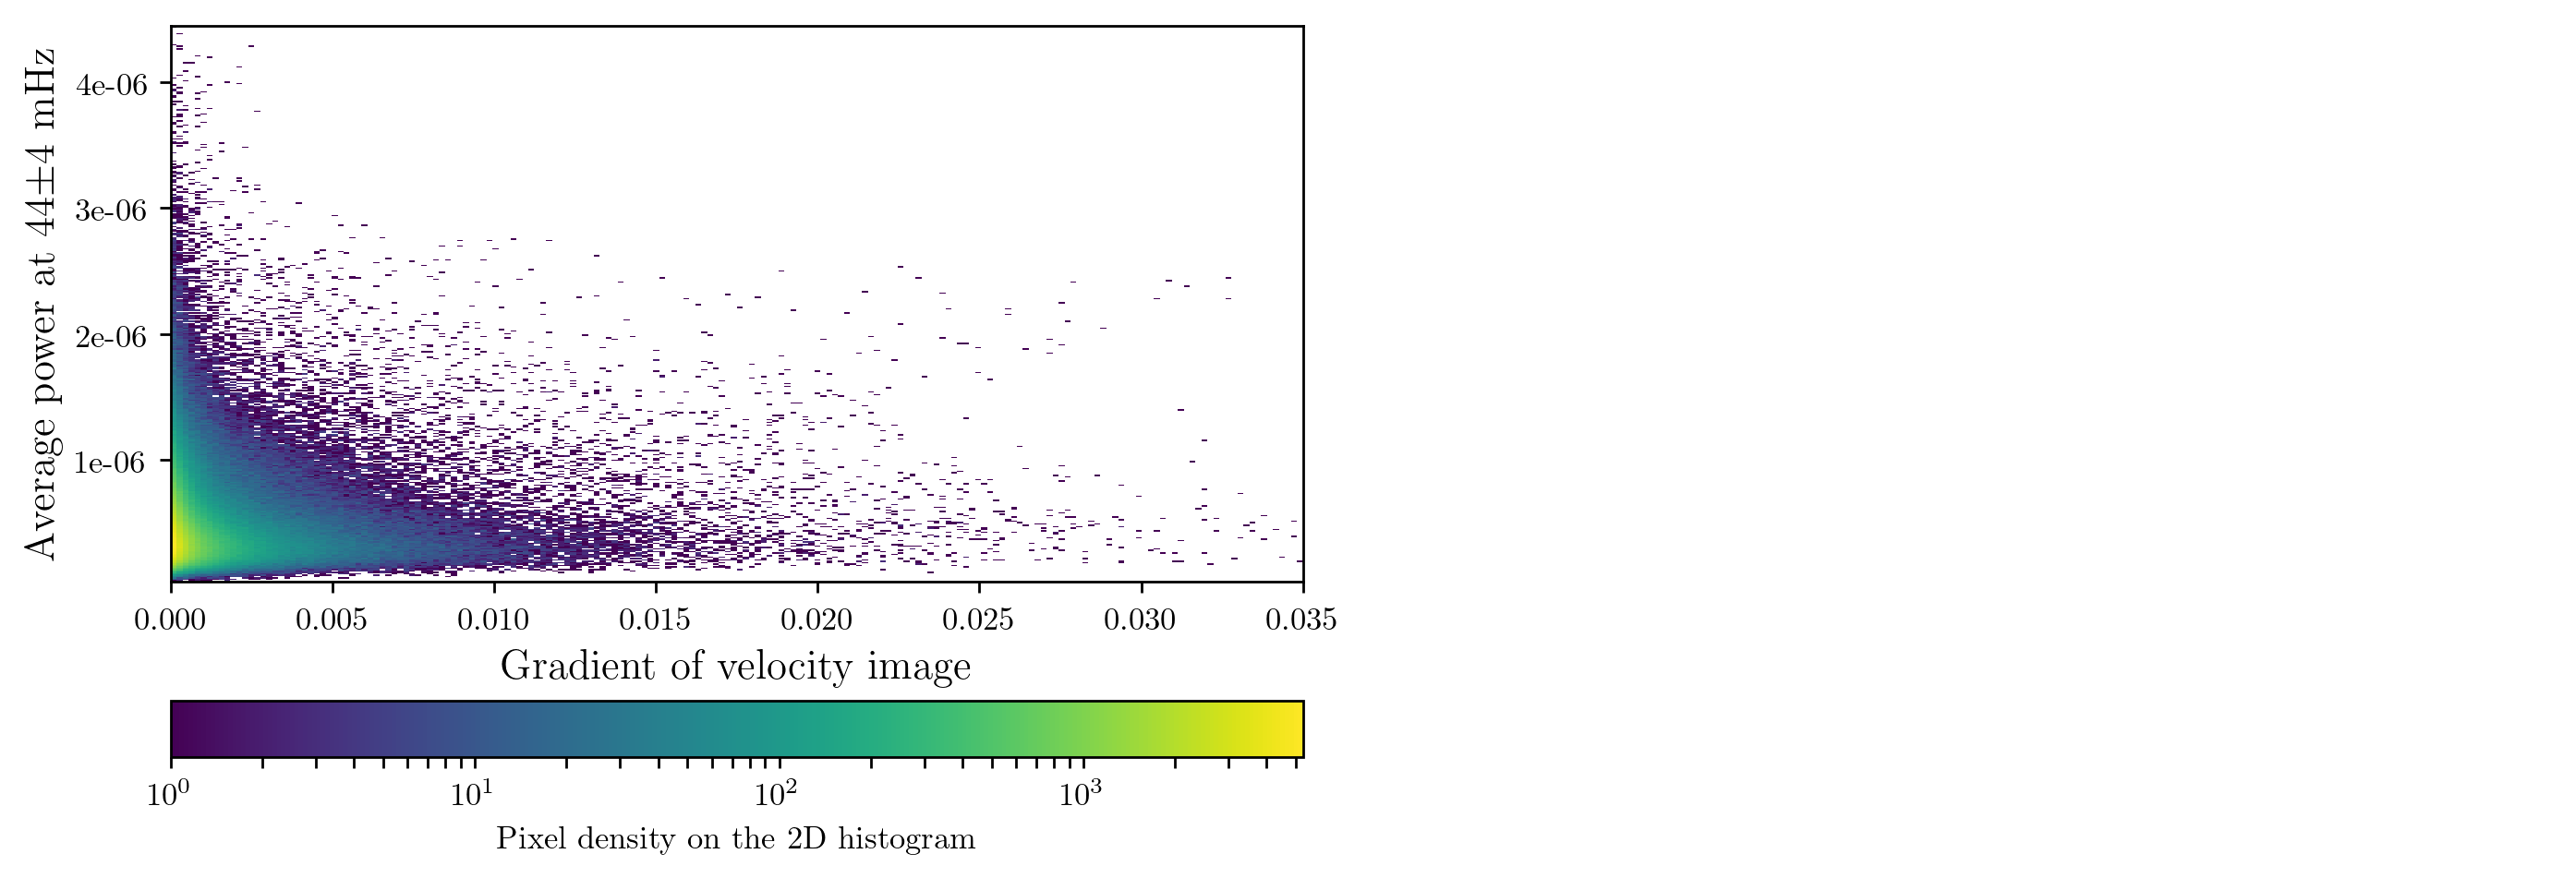

In [3]:
data_dir='/Users/molnarad/CU_Boulder/Work/Chromospheric_business/Comps_2/comps_data/IBIS/'

fft_file  = 'fft.m1nb.vel.cog.23Apr2017.target1.all.6563.ser_151857.sav'
data_file = 'param1nb.vel.cog.23Apr2017.target1.all.6563.ser_151857.fits'
plt.rc('text', usetex=True)
font = {'family' : 'serif',
        'weight' : 'bold',
        'size'   : 10}

mp.rc('font', **font)

fontsize_axis  = 13
fontsize_ticks = 10

fft         = sp.io.readsav((data_dir+fft_file),verbose=False)
data_fft    = fft.fft_data
frequency   = fft.freq1
hdul        = fits.open(data_dir+data_file)
data_vel    = np.flip((hdul[0].data)[34,:,:],axis=0)
grad        = np.gradient(data_vel)
grad_vel    = (np.square(grad[0])+np.square(grad[1]))
grad_vel_norm = max(grad_vel.flatten())
grad_vel    = grad_vel / grad_vel_norm
freq_index  = [17,23]
freq_indexm = int(np.mean(freq_index))
freq2       = frequency[freq_indexm]*1e3

#plt.imshow(grad_vel,cmap='gist_gray',vmax=1e-5)
fig,ax      = plt.subplots()
fig.figsize = (12,14)
fig.dpi     = 250

freq21    = (np.mean(data_fft[freq_index[0]:freq_index[1],100:-100,100:-100],axis=0))
freq_data = freq21.flatten()

hist        = ax.hist2d(grad_vel[100:-100,100:-100].flatten(),freq_data,bins=400,norm=colors.LogNorm(), cmap='viridis')
cbar        = fig.colorbar(hist[3], ax=ax, orientation='horizontal')
cbar.ax.set_xlabel('Pixel density on the 2D histogram')
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.0e'))
ax.set_xlabel('Gradient of velocity image',fontsize=fontsize_axis)
ax.set_ylabel('Average power at '+str('%2.0f' % freq2)+'$\pm$4 mHz',fontsize=fontsize_axis)
plt.xlim(0,0.035)
plt.tight_layout()
fig.savefig('comps_paper/Figures/Fig_gradient_image.png')
plt.show()

In [10]:
def power_law(x,a,b):
    #power law function where x free variable, a is slope, b is offset in log log space
    #c is offset in linear space
    return a*(x)+b

print(frequency[1:9])

popt, pcov = curve_fit(power_law,np.log(frequency[1:11]),np.log(fft_data[1:11,500,500]))
print(popt)
a = (frequency.shape)[0]
print(a)


NameError: name 'frequency' is not defined

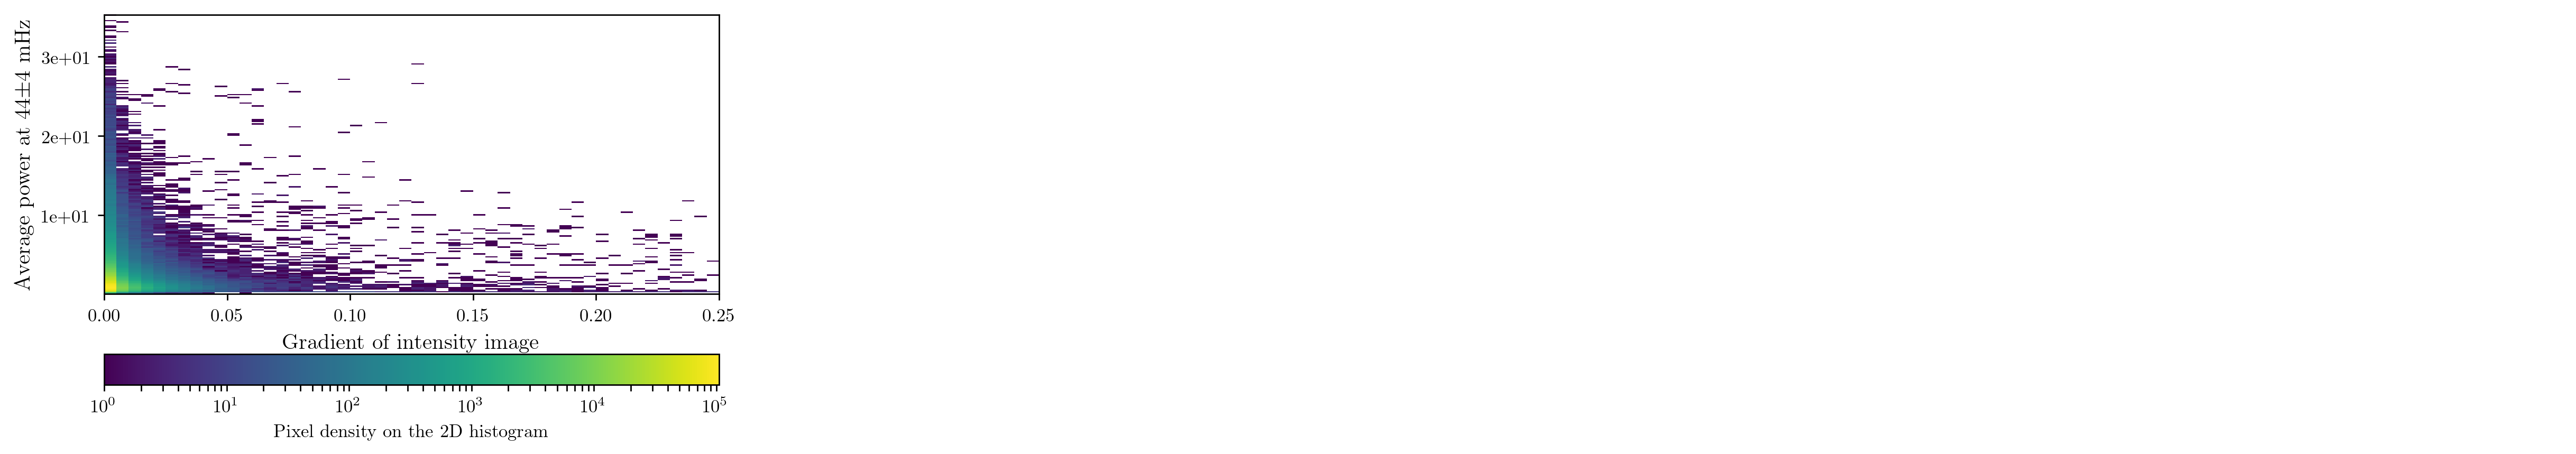

In [4]:
data_dir='/Users/molnarad/CU_Boulder/Work/Chromospheric_business/Comps_2/comps_data/IBIS/'

fft_file  = 'fft.m1nb.int.lc.23Apr2017.target1.all.6563.ser_151857.sav'
data_file = 'param1nb.int.lc.23Apr2017.target1.all.6563.ser_151857.fits'
plt.rc('text', usetex=True)
font = {'family' : 'serif',
        'weight' : 'bold',
        'size'   : 10}

mp.rc('font', **font)
fontsize_axis  = 12
fontsize_ticks = 10

fft         = sp.io.readsav((data_dir+fft_file),verbose=False)
data_fft    = fft.fft_data
frequency   = fft.freq1
hdul        = fits.open(data_dir+data_file)
data_vel    = np.flip((hdul[0].data)[34,:,:],axis=0)
grad        = np.gradient(data_vel)
grad_vel    = (np.square(grad[0])+np.square(grad[1]))
grad_vel_norm = max(grad_vel.flatten())
grad_vel    = grad_vel / grad_vel_norm
freq_index  = [17,23]
freq_indexm = int(np.mean(freq_index))
freq2       = frequency[freq_indexm]*1e3

#plt.imshow(grad_vel,cmap='gist_gray',vmax=1e-5)
fig,ax      = plt.subplots()
fig.figsize = (8,12)
fig.dpi     = 250

freq21    = (np.mean(data_fft[freq_index[0]:freq_index[1],:,:],axis=0))
freq_data = freq21.flatten()

hist        = ax.hist2d(grad_vel.flatten(),freq_data,bins=200,norm=colors.LogNorm(), cmap='viridis')
cbar        = fig.colorbar(hist[3], ax=ax, orientation='horizontal')
cbar.ax.set_xlabel('Pixel density on the 2D histogram',fontsize=fontsize_ticks)
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.0e'))
ax.set_xlabel('Gradient of intensity image',fontsize=fontsize_axis)
ax.set_ylabel('Average power at '+str('%2.0f' % freq2)+'$\pm$4 mHz',fontsize=fontsize_axis)
plt.xlim(0,0.25)
fig.savefig('comps_paper/Figures/Fig_gradient_image_2.png')
plt.show()

In [11]:
#plt.plot(frequency,np.mean(np.mean(fft_data[:,100:540,200:540],axis=1),axis=1),'r*--')
plt.plot(frequency,fft_data[:,500,500],'r*--',label='Observations')
plt.plot(frequency,np.exp(power_law(np.log(frequency),popt[0],popt[1])),'b.--',label='Fit')
plt.yscale('log')
plt.legend()
plt.xscale('log')

plt.show()

plt.plot(frequency,(fft_data[:,500,500]-np.exp(power_law(np.log(frequency),popt[0],popt[1]))),'b.--',label='Fit')
plt.xscale('log')
plt.yscale('log')
plt.show()

NameError: name 'frequency' is not defined

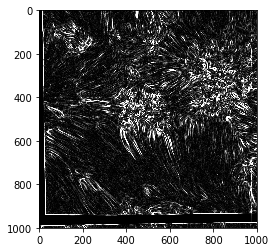

In [164]:
a = np.gradient(np.flip(data_vel,axis=0))
plt.imshow(np.square(a[1])+np.square(a[0]),cmap='gist_gray',vmax=1e-4)
plt.show()

In [41]:
frequency[17:23]

array([0.03777778, 0.04      , 0.04222222, 0.04444445, 0.04666667,
       0.04888889], dtype=float32)

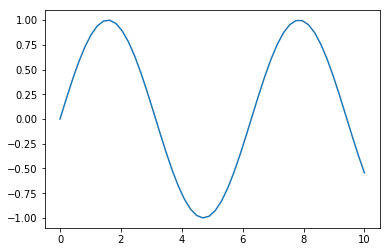

In [2]:
x = np.linspace(0,10)
y = np.sin(x)
plt.plot(x,y)
plt.show()

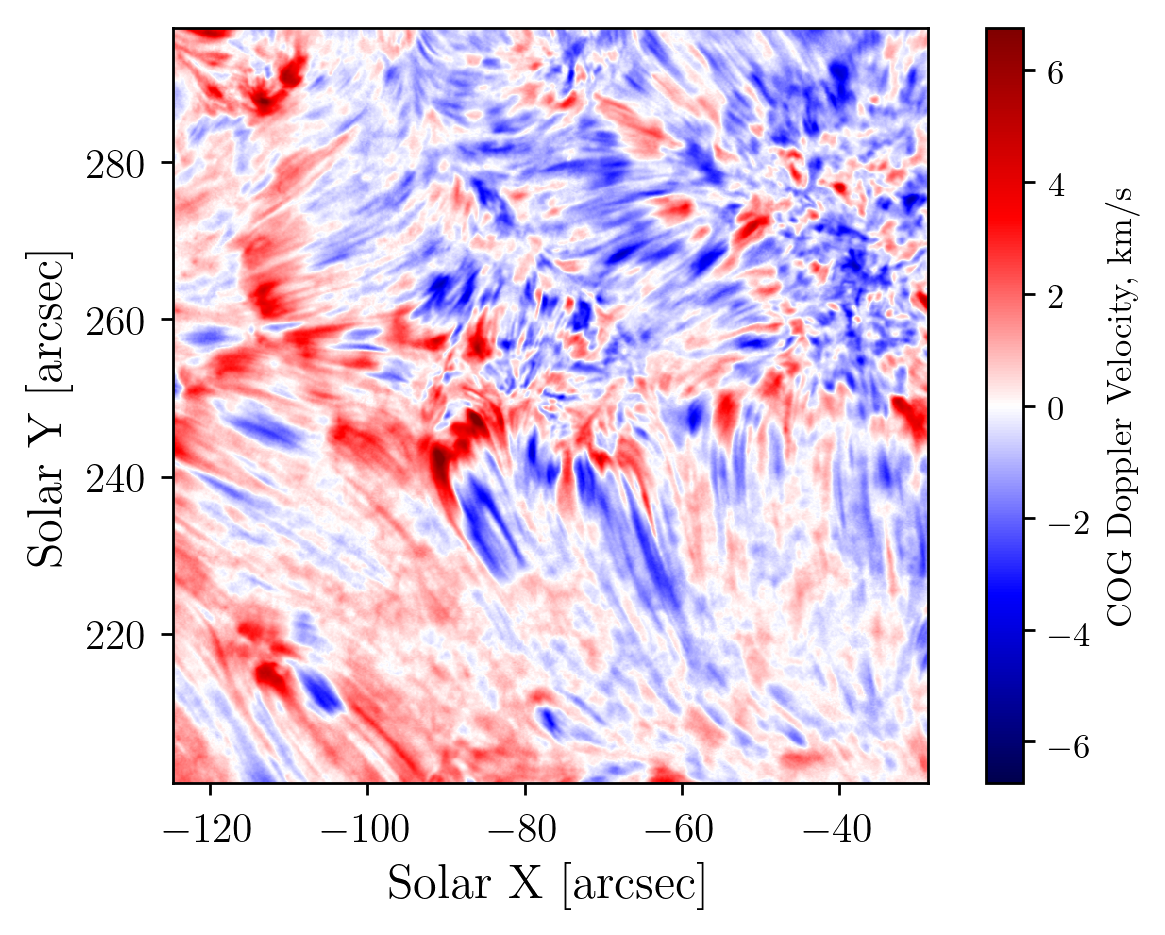

In [25]:
plt.figure(dpi=250)
field1_lim =[-124.75,-28.75,200.99,296.99]
im1 = plt.imshow((data_vel[100:-100,100:-100]-np.mean(data_vel[100:-100,100:-100]))*45
           ,cmap='seismic',vmax=.15*45,vmin=-.15*45,extent=field1_lim)
plt.ylabel('Solar Y [arcsec]',fontsize=14)
plt.xlabel('Solar X [arcsec]',fontsize=14)
plt.tick_params(labelsize=12)
plt.colorbar(im1,label='COG Doppler Velocity, km/s')
plt.show()

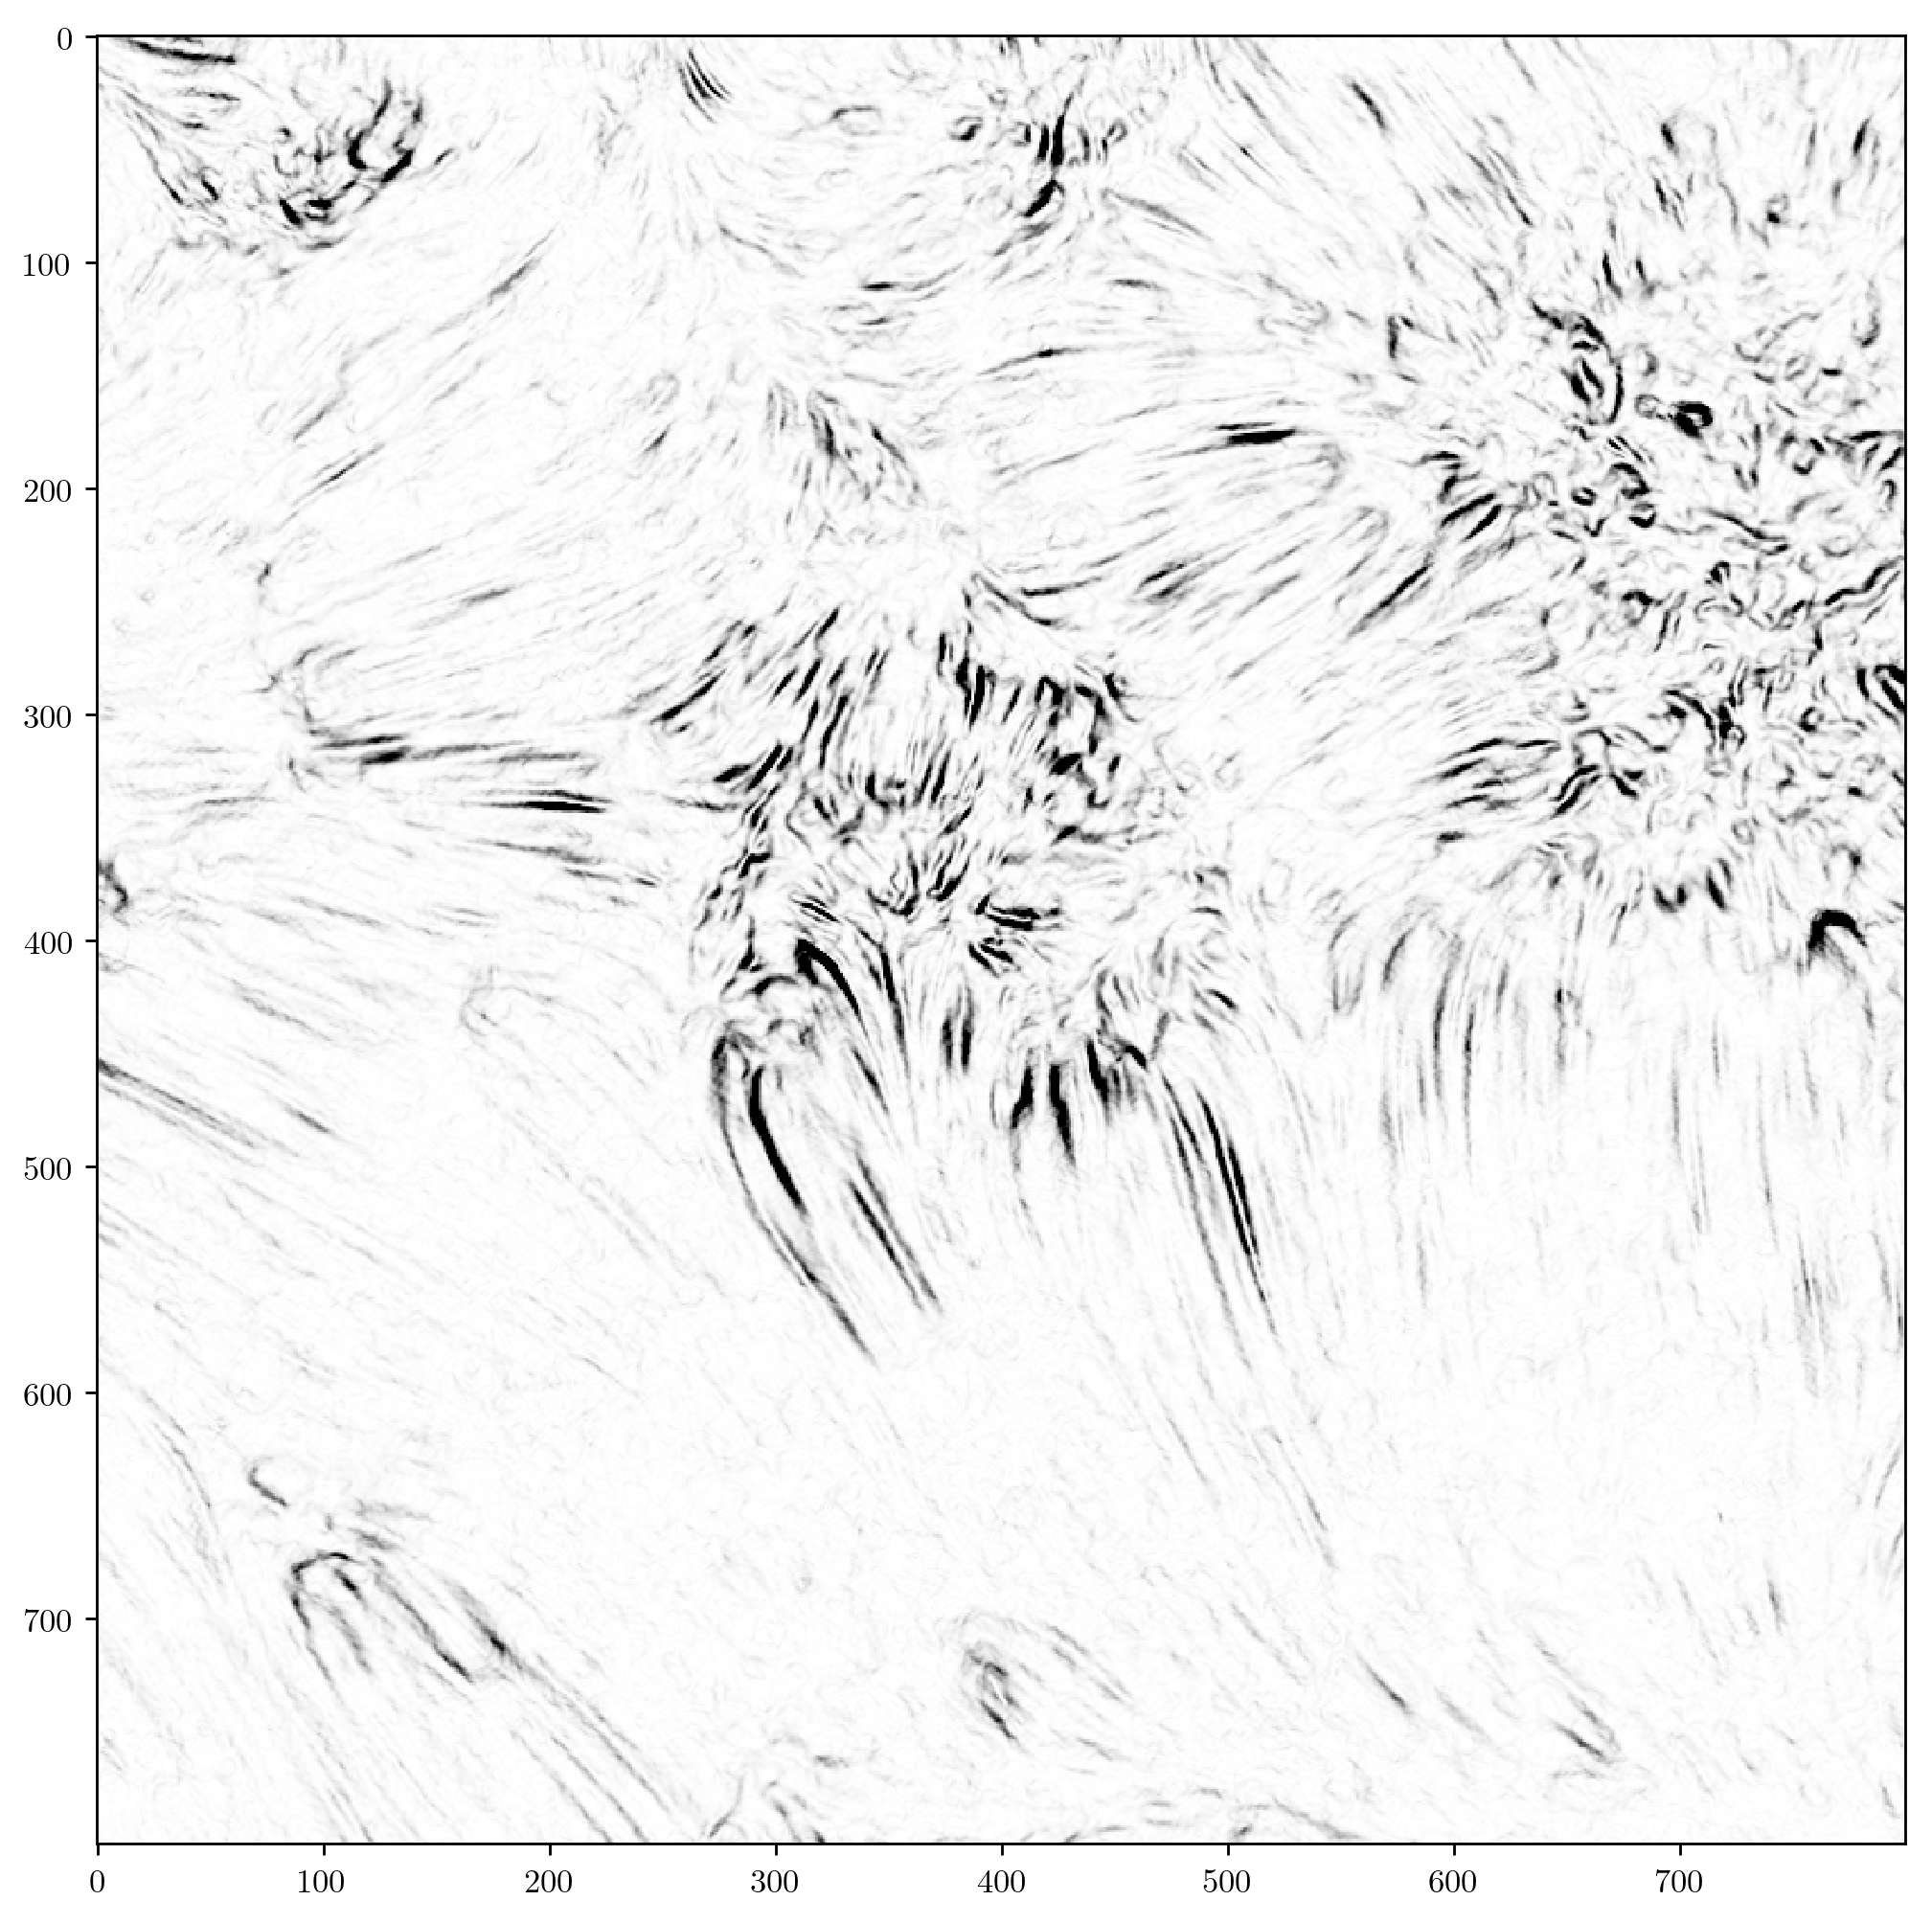

In [21]:
plt.figure(figsize=(10,10),dpi=250)
plt.imshow(grad_vel[100:-100,100:-100],vmin=0,vmax=.01,cmap='Greys')
plt.show()

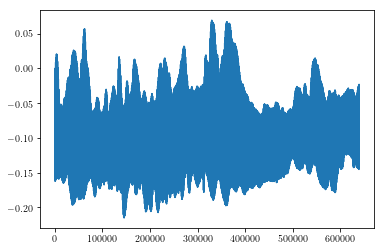

In [23]:
plt.plot(data_vel[100:-100,100:-100].flatten())
plt.show()

/Users/molnarad/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  """Entry point for launching an IPython kernel.


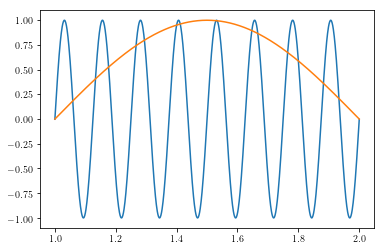

In [34]:
x = np.linspace(1,2,num=1e3)
period = 2.5e-1/2
wave = np.sin(x*2*3.1415/period)
period2 = 2
cont_fun = np.sin(x*2*3.1415/period2)*-1 
plt.plot(x,wave)
plt.plot(x,cont_fun)
plt.show()

In [30]:
np.sin(90/57.8)

0.999870016420549